In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [32]:
files = ["$HOME/fjpythia/output/826.root"]
a = getDataPart(files)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]

d = applyCut(a, 'pt_quark > 4', 'pt_quark > 4')
d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(d, 'pT_part > 0.25', 'pT_part > 0.25') # removes masked electrons
d.eval('id_part_abs = abs(id_part)', inplace=True)
d.eval('id_lead_part_abs = abs(id_lead_part)', inplace=True)
d = getIdAbs(d, 'id_quark', [-3, -4, -5])

q = keepOneJet(d)
k0 = applyCut(keepOnePart(d), 'id_lead_part_abs == 130', 'K^0_L')
k = applyCut(keepOnePart(d), 'id_lead_part_abs == 321', 'K^+K^-')


Processed $HOME/fjpythia/output/826.root in 68.2 seconds
pt_quark > 4 418571  fraction kept: 5.6
0.01 < y < 0.85 399539  fraction kept: 95.5
W2 > 4 399539  fraction kept: 100.0
pT_part > 0.25 363259  fraction kept: 90.9
id_quark of -3 is changed to positive
id_quark of -4 is changed to positive
id_quark of -5 is changed to positive

Remove extra jets 36273  fraction kept: 10.0

Remove extra part 148742  fraction kept: 40.9
K^0_L 5305  fraction kept: 3.6

Remove extra part 148742  fraction kept: 40.9
K^+K^- 11278  fraction kept: 7.6

Remove extra jets 9290  fraction kept: 82.4


In [3]:
id_table = getIdAndCounts(q, 'id_quark', other=False)
particle_array = getQuark(id_table[0])
count_array = id_table[1]
print id_table

[[   -2    -1     1     2     3     4     5]
 [ 4937  1457  3612 22449  1081  2682    55]]


([<matplotlib.patches.Wedge at 0x7ffd24865590>,
 [Text(1.00096,0.456149,'$\\overline{u}$'),
  Text(0.611469,0.914388,'$\\overline{d}$'),
  Text(0.164814,1.08758,'$d$'),
  Text(-0.945767,-0.561715,'$u$'),
  Text(0.927438,-0.591488,'$s$/$\\overline{s}$'),
  Text(1.068,-0.263411,'$c$/$\\overline{c}$'),
  Text(1.09999,-0.00523969,'$b$/$\\overline{b}$')],
 [Text(0.54598,0.248808,'13.6%'),
  Text(0.333528,0.498757,'4.0%'),
  Text(0.0898988,0.593227,'10.0%'),
  Text(-0.515873,-0.30639,'61.9%'),
  Text(0.505875,-0.32263,'3.0%'),
  Text(0.582543,-0.143679,'7.4%'),
  Text(0.599993,-0.00285802,'0.2%')])

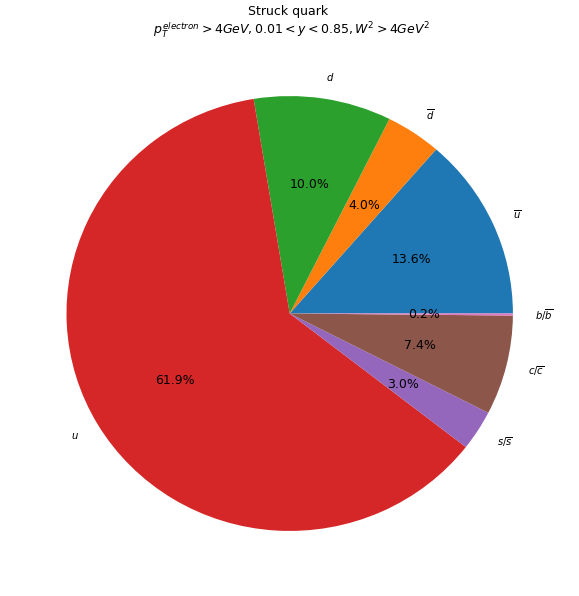

In [4]:
fig = plt.figure(figsize=(10,10))
plt.title('Struck quark \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [21]:
id_table = getIdAndCounts(k0, 'id_quark', other=False)
particle_array = getQuark(id_table[0])
count_array = id_table[1]
print id_table

[[  -2   -1    1    2    3    4    5]
 [ 674  237  509 2657  405  807   16]]


([<matplotlib.patches.Wedge at 0x7ffd2472cb50>,
 [Text(1.01354,0.427488,'$\\overline{u}$'),
  Text(0.649985,0.887423,'$\\overline{d}$'),
  Text(0.208167,1.08012,'$d$'),
  Text(-1.0929,-0.124802,'$u$'),
  Text(0.383592,-1.03095,'$s$/$\\overline{s}$'),
  Text(0.966996,-0.524326,'$c$/$\\overline{c}$'),
  Text(1.09995,-0.0104226,'$b$/$\\overline{b}$')],
 [Text(0.552838,0.233175,'12.7%'),
  Text(0.354537,0.484049,'4.5%'),
  Text(0.113545,0.589158,'9.6%'),
  Text(-0.596126,-0.0680739,'50.1%'),
  Text(0.209232,-0.562336,'7.6%'),
  Text(0.527453,-0.285996,'15.2%'),
  Text(0.599973,-0.00568508,'0.3%')])

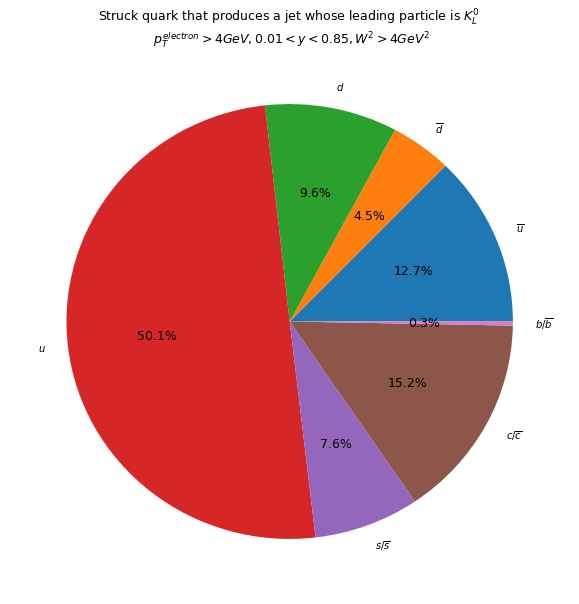

In [22]:
fig = plt.figure(figsize=(10,10))
plt.title('Struck quark that produces a jet whose leading particle is $K^0_L$ \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [23]:
id_table = getIdAndCounts(k, 'id_quark', other=False)
particle_array = getQuark(id_table[0])
count_array = id_table[1]
print id_table

[[  -2   -1    1    2    3    4    5]
 [1450  381  866 6042  722 1776   41]]


([<matplotlib.patches.Wedge at 0x7ffd2449a2d0>,
 [Text(1.01148,0.43232,'$\\overline{u}$'),
  Text(0.671682,0.871116,'$\\overline{d}$'),
  Text(0.335019,1.04774,'$d$'),
  Text(-1.09893,-0.0483981,'$u$'),
  Text(0.384815,-1.03049,'$s$/$\\overline{s}$'),
  Text(0.95593,-0.54424,'$c$/$\\overline{c}$'),
  Text(1.09993,-0.0125627,'$b$/$\\overline{b}$')],
 [Text(0.551719,0.235811,'12.9%'),
  Text(0.366372,0.475154,'3.4%'),
  Text(0.182738,0.571495,'7.7%'),
  Text(-0.599419,-0.0263989,'53.6%'),
  Text(0.209899,-0.562087,'6.4%'),
  Text(0.521416,-0.296858,'15.7%'),
  Text(0.599961,-0.00685239,'0.4%')])

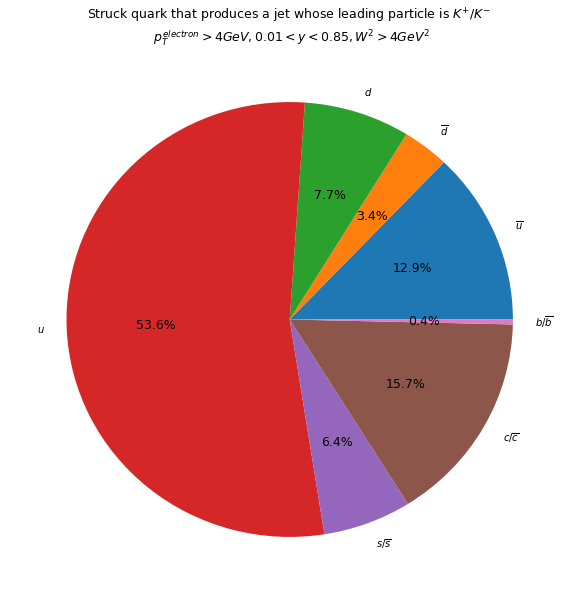

In [24]:
fig = plt.figure(figsize=(10,10))
plt.title('Struck quark that produces a jet whose leading particle is $K^{+}$/$K^{-}$ \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [25]:
b = getDelta(d, 'quark')
b = applyCut(b, 'delta_pt_quark_abs < 1', 'delta_pt_quark_abs < 1')
b = applyCut(b, 'delta_eta_quark_abs < 0.5', 'delta_eta_quark_abs < 0.5')

q = keepOneJet(b)
k0 = applyCut(keepOnePart(b), 'id_lead_part_abs == 130', 'K^0_L')
k = applyCut(keepOnePart(b), 'id_lead_part_abs == 321', 'K^+K^-')

Added colomns for variables of quark jet correlation
delta_pt_quark_abs < 1 109293  fraction kept: 30.1
delta_eta_quark_abs < 0.5 90073  fraction kept: 82.4

Remove extra jets 17458  fraction kept: 19.4

Remove extra part 17529  fraction kept: 19.5
K^0_L 725  fraction kept: 4.1

Remove extra part 17529  fraction kept: 19.5
K^+K^- 1774  fraction kept: 10.1


In [26]:
id_table = getIdAndCounts(q, 'id_quark', other=False)
particle_array = getQuark(id_table[0])
count_array = id_table[1]
print id_table

[[   -2    -1     1     2     3     4     5]
 [ 2270   685  1797 11212   471  1011    12]]


([<matplotlib.patches.Wedge at 0x7ffd2440a9d0>,
 [Text(1.00949,0.436946,'$\\overline{u}$'),
  Text(0.648548,0.888474,'$\\overline{d}$'),
  Text(0.201163,1.08145,'$d$'),
  Text(-0.916304,-0.608594,'$u$'),
  Text(0.989082,-0.48137,'$s$/$\\overline{s}$'),
  Text(1.08098,-0.203692,'$c$/$\\overline{c}$'),
  Text(1.1,-0.00237537,'$b$/$\\overline{b}$')],
 [Text(0.550633,0.238334,'13.0%'),
  Text(0.353753,0.484622,'3.9%'),
  Text(0.109725,0.589882,'10.3%'),
  Text(-0.499802,-0.331961,'64.2%'),
  Text(0.539499,-0.262565,'2.7%'),
  Text(0.589623,-0.111105,'5.8%'),
  Text(0.599999,-0.00129566,'0.1%')])

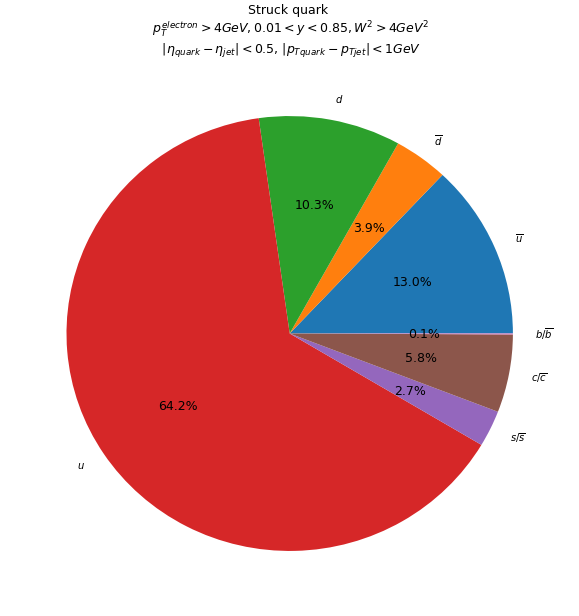

In [27]:
fig = plt.figure(figsize=(10,10))
plt.title('Struck quark \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$ \n $|\eta_{quark} - \eta_{jet}| < 0.5$, $|p_{Tquark} -p_{Tjet}| < 1 GeV$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [28]:
id_table = getIdAndCounts(k0, 'id_quark', other=False)
particle_array = getQuark(id_table[0])
count_array = id_table[1]
print id_table

[[ -2  -1   1   2   3   4]
 [ 63  38  91 358  77  98]]


([<matplotlib.patches.Wedge at 0x7ffd243ff110>,
 [Text(1.05926,0.296577,'$\\overline{u}$'),
  Text(0.833732,0.717559,'$\\overline{d}$'),
  Text(0.326291,1.05049,'$d$'),
  Text(-1.09702,-0.0809581,'$u$'),
  Text(0.415993,-1.01831,'$s$/$\\overline{s}$'),
  Text(1.0023,-0.453209,'$c$/$\\overline{c}$')],
 [Text(0.577781,0.161769,'8.7%'),
  Text(0.454763,0.391396,'5.2%'),
  Text(0.177977,0.572996,'12.6%'),
  Text(-0.598373,-0.044159,'49.4%'),
  Text(0.226905,-0.55544,'10.6%'),
  Text(0.546708,-0.247205,'13.5%')])

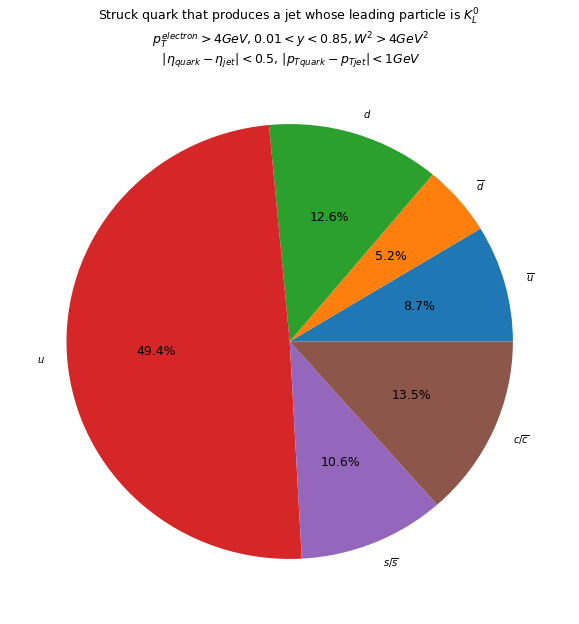

In [29]:
fig = plt.figure(figsize=(10,10))
plt.title('Struck quark that produces a jet whose leading particle is $K^0_L$ \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$ \n $|\eta_{quark} - \eta_{jet}| < 0.5$, $|p_{Tquark} -p_{Tjet}| < 1 GeV$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [30]:
id_table = getIdAndCounts(k, 'id_quark', other=False)
particle_array = getQuark(id_table[0])
count_array = id_table[1]
print id_table

[[  -2   -1    1    2    3    4    5]
 [ 189   40  116 1085  138  204    2]]


([<matplotlib.patches.Wedge at 0x7ffd2436c050>,
 [Text(1.03896,0.361336,'$\\overline{u}$'),
  Text(0.812137,0.741912,'$\\overline{d}$'),
  Text(0.578978,0.935299,'$d$'),
  Text(-1.1,-0.00194808,'$u$'),
  Text(0.618195,-0.909854,'$s$/$\\overline{s}$'),
  Text(1.02622,-0.396083,'$c$/$\\overline{c}$'),
  Text(1.09999,-0.00389583,'$b$/$\\overline{b}$')],
 [Text(0.566705,0.197093,'10.7%'),
  Text(0.442984,0.404679,'2.3%'),
  Text(0.315806,0.510163,'6.5%'),
  Text(-0.599999,-0.00106259,'61.2%'),
  Text(0.337197,-0.496284,'7.8%'),
  Text(0.559754,-0.216045,'11.5%'),
  Text(0.599996,-0.002125,'0.1%')])

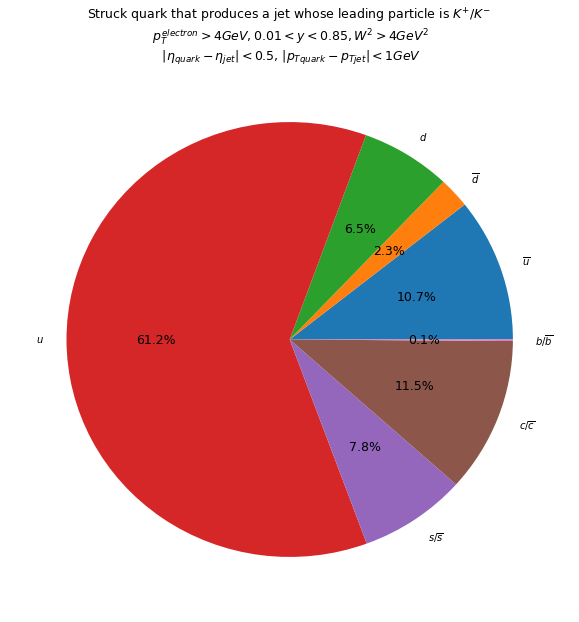

In [31]:
fig = plt.figure(figsize=(10,10))
plt.title('Struck quark that produces a jet whose leading particle is $K^{+}$/$K^{-}$ \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$ \n $|\eta_{quark} - \eta_{jet}| < 0.5$, $|p_{Tquark} -p_{Tjet}| < 1 GeV$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})